In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read in excel file
file_2015 = 'happiness_data/2015.csv'
file_2016 = 'happiness_data/2016.csv'
file_2017 = 'happiness_data/2017.csv'

happiness_data_2015 = pd.read_csv(file_2015)
happiness_data_2016 = pd.read_csv(file_2016)
happiness_data_2017 = pd.read_csv(file_2017)

#add year column
happiness_data_2015['Year']= 2015
happiness_data_2016['Year']= 2016
happiness_data_2017['Year']= 2017

#get ready to concatenate our data together
list_data = [happiness_data_2015, happiness_data_2016, happiness_data_2017]


# happiness_data = pd.concat(list_data)

# happiness_data.head()

#match column names in all three data files
happiness_data_2017 = happiness_data_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 
                                                          'Happiness.Score': 'Happiness Score',
                                                          'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)',
                                                          'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                                          'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 
                                                          'Dystopia.Residual' : 'Dystopia Residual'})

happiness_data_2015 = happiness_data_2015[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual', 'Year']]
happiness_data_2016 = happiness_data_2016[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual', 'Year']]
happiness_data_2017 = happiness_data_2017[['Country', 'Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual', 'Year']]

In [ ]:
#adding region column to 2017 data, cleaning up country/region names
country_region = {}

for i,row in happiness_data_2015.iterrows():
       country_region.update({row['Country']:row['Region']})
for i,row in happiness_data_2016.iterrows():
       country_region.update({row['Country']:row['Region']})
   
happiness_data_2017['Region'] = ''

try:
       for i, row in happiness_data_2017.iterrows():
           country = row['Country']
           if country == 'Taiwan Province of China':
                happiness_data_2017.at[i,'Country'] = 'Taiwan'
                happiness_data_2017.at[i,'Region'] = 'Eastern Asia'
           elif country == 'Belize':
               happiness_data_2017.at[i,'Region'] = 'Latin America and Caribbean'
           elif country == 'Hong Kong S.A.R., China':
               happiness_data_2017.at[i,'Region'] = 'Eastern Asia'
           elif country == 'Somalia':
               happiness_data_2017.at[i,'Region'] = 'Sub-Saharan Africa'
           else:
               happiness_data_2017.at[i,'Region'] = country_region[country]
except KeyError:
       print(f"Cannot find {country}")
       pass
   
#rearranging columns for cleaniness
happiness_data_2017 = happiness_data_2017[['Year','Country', 'Region','Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual']]
happiness_data_2015 = happiness_data_2015[['Year','Country', 'Region','Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual']]
happiness_data_2016 = happiness_data_2016[['Year','Country', 'Region','Happiness Rank', 'Happiness Score', 
                                          'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                                          'Freedom', 'Trust (Government Corruption)','Generosity', 
                                          'Dystopia Residual']]


In [ ]:
# plot regions by average happiness

happiness_by_region_2017 = happiness_data_2017.groupby('Region')
avg_happiness_by_region_2017 = happiness_by_region_2017['Happiness Score'].mean()
avg_happiness_by_region_2017.plot(kind='bar', figsize=(10,4) )
plt.show()

In [ ]:
# plot regions by average happiness

happiness_by_region_2016 = happiness_data_2016.groupby('Region')
avg_happiness_by_region_2016 = happiness_by_region_2016['Happiness Score'].mean()
avg_happiness_by_region_2016.plot(kind='bar', figsize=(10,4) )
plt.show()

In [ ]:
# plot regions by average happiness

happiness_by_region_2015 = happiness_data_2015.groupby('Region')
avg_happiness_by_region_2015 = happiness_by_region_2015['Happiness Score'].mean()
avg_happiness_by_region_2015.plot(kind='bar', figsize=(10,4) )
plt.show()

In [ ]:
# do a variance comparison for the regions

#  Analysis to study impact of internet usage on happiness

Popular thought and policy seems to drive that internet usage leads to development and therefore happiness should increase amonmgst the population. A study of the data however, gives some interesting insights. Effect of Internet usage is subjective from country to country. While in some countries, it shows a positive relationship, in some it is neutral and in some cases even negative. We picked some example countries to highlight this.
1) In the first case, countries like Aghanistan and to a certain extent China, show a positive co-relation. These could be attributed to the opening up effect that internet has to these countries as they were isolated earlier. The internet may also be an enabling factor to improve economic aspects.
2) In the second case of little or no relationship seems to be for developed countries, like Japan, where a high majority of population has internet access, and the society is fairly homogenous. Given this, it looks like there is a point beyond which further internet usage increases have no signifcant impact.
3) The third case where we see decreasing happiness with internet usage, is rather surprising. But it seems to be the case in some rapidly developing countries where internet and technology have played a significant impact. On further research and study, this may be attributed to the significant societal divisions that exist, like income or social divide. While many people have access to the internet and use it, other factors stop them from being able to derive benefit from it. And social media also tends to have a negative impact in such societies. In these cases, internet may actually be having a negative impact on people's happiness.

In [2]:
#see effect of internet usage on happiness score
happiness_data_historical = pd.read_csv('happiness_data/hapinnesscorehistorical.csv')
print(happiness_data_historical.dtypes)
happiness_data_historical.head()


country         object
year             int64
Life Ladder    float64
dtype: object


,country,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938


In [3]:
internet_usage_historical = pd.read_csv('happiness_data/internetusage.csv', encoding='iso-8859-1')
internet_usage_historical.head()

,Country Name,Country Code,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,52.00,58.00,62.0,69.0,74.000000,78.9,83.78,88.661227,93.542454,NaN
1,Afghanistan,AFG,1.84,3.55,4.0,5.0,5.454545,5.9,7.00,8.260000,10.595726,NaN
2,Angola,AGO,1.90,2.30,2.8,3.1,6.500000,8.9,10.20,12.400000,13.000000,NaN
3,Albania,ALB,23.86,41.20,45.0,49.0,54.655959,57.2,60.10,63.252933,66.363445,NaN
4,Andorra,AND,70.04,78.53,81.0,81.0,86.434425,94.0,95.90,96.910000,97.930637,NaN


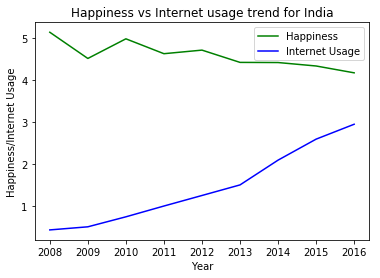

In [10]:
## plot happiness and internet usage by year for 
country = "India"
years = np.arange(2008,2017,1)

happiness_scores = []
internet_usage = []

for yr in years :
    hp_score = happiness_data_historical[(happiness_data_historical['country'] == country) & (happiness_data_historical['year']==yr)]
    happiness_scores.append(hp_score.iloc[0]['Life Ladder'])
    
    int_use = internet_usage_historical[internet_usage_historical['Country Name']== country]
    internet_usage.append((int_use.iloc[0][str(yr)])/10)

#print(happiness_scores)
#print(internet_usage)
hp_handle, = plt.plot(years, happiness_scores, color="green", label='Happiness')
int_handle, = plt.plot(years, internet_usage, color="blue", label='Internet Usage')
plt.title(f"Happiness vs Internet usage trend for {country}")
plt.xlabel("Year")
plt.ylabel("Happiness/Internet Usage")
plt.legend(handles=[hp_handle, int_handle], loc="upper right")
plt.savefig(f"HapInt_{country}.png")
plt.show()

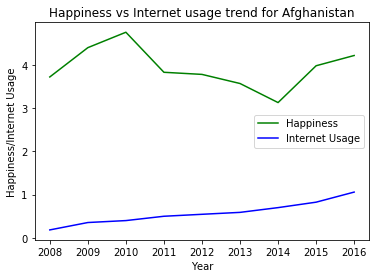

In [13]:
## plot happiness and internet usage by year for 
country = "Afghanistan"
years = np.arange(2008,2017,1)

happiness_scores = []
internet_usage = []

for yr in years :
    hp_score = happiness_data_historical[(happiness_data_historical['country'] == country) & (happiness_data_historical['year']==yr)]
    hp_score.reindex()
    happiness_scores.append(hp_score.iloc[0]['Life Ladder'])
    
    int_use = internet_usage_historical[internet_usage_historical['Country Name']== country]
    internet_usage.append((int_use.iloc[0][str(yr)])/10)

#print(happiness_scores)
#print(internet_usage)
hp_handle, = plt.plot(years, happiness_scores, color="green", label='Happiness')
int_handle, = plt.plot(years, internet_usage, color="blue", label='Internet Usage')
plt.title(f"Happiness vs Internet usage trend for {country}")
plt.xlabel("Year")
plt.ylabel("Happiness/Internet Usage")
plt.legend(handles=[hp_handle, int_handle])
plt.savefig(f"HapInt_{country}.png")
plt.show()

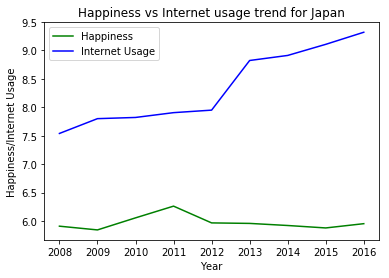

In [14]:
## plot happiness and internet usage by year for 
country = "Japan"
years = np.arange(2008,2017,1)

happiness_scores = []
internet_usage = []

for yr in years :
    hp_score = happiness_data_historical[(happiness_data_historical['country'] == country) & (happiness_data_historical['year']==yr)]
    hp_score.reindex()
    happiness_scores.append(hp_score.iloc[0]['Life Ladder'])
    
    int_use = internet_usage_historical[internet_usage_historical['Country Name']== country]
    internet_usage.append((int_use.iloc[0][str(yr)])/10)

#print(happiness_scores)
#print(internet_usage)
hp_handle, = plt.plot(years, happiness_scores, color="green", label='Happiness')
int_handle, = plt.plot(years, internet_usage, color="blue", label='Internet Usage')
plt.title(f"Happiness vs Internet usage trend for {country}")
plt.xlabel("Year")
plt.ylabel("Happiness/Internet Usage")
plt.legend(handles=[hp_handle, int_handle])
plt.savefig(f"HapInt_{country}.png")
plt.show()

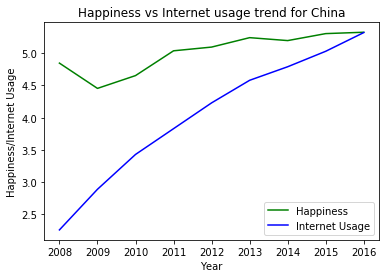

In [15]:
## plot happiness and internet usage by year for 
country = "China"
years = np.arange(2008,2017,1)

happiness_scores = []
internet_usage = []

for yr in years :
    hp_score = happiness_data_historical[(happiness_data_historical['country'] == country) & (happiness_data_historical['year']==yr)]
    hp_score.reindex()
    happiness_scores.append(hp_score.iloc[0]['Life Ladder'])
    
    int_use = internet_usage_historical[internet_usage_historical['Country Name']== country]
    internet_usage.append((int_use.iloc[0][str(yr)])/10)

#print(happiness_scores)
#print(internet_usage)
hp_handle, = plt.plot(years, happiness_scores, color="green", label='Happiness')
int_handle, = plt.plot(years, internet_usage, color="blue", label='Internet Usage')
plt.title(f"Happiness vs Internet usage trend for {country}")
plt.xlabel("Year")
plt.ylabel("Happiness/Internet Usage")
plt.legend(handles=[hp_handle, int_handle])
plt.savefig(f"HapInt_{country}.png")
plt.show()